In [ ]:
importing libraries

In [7]:
import pandas as pd

In [8]:
#Reading csv file

In [9]:
retail_data = pd.read_csv("retail_sales_dataset.csv")

In [10]:
#Printing the dataset

In [6]:
retail_data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24-11-2023,CUST001,Male,34,Beauty,3,50,150
1,2,27-02-2023,CUST002,Female,26,Clothing,2,500,1000
2,3,13-01-2023,CUST003,Male,50,Electronics,1,30,30
3,4,21-05-2023,CUST004,Male,37,Clothing,1,500,500
4,5,06-05-2023,CUST005,Male,30,Beauty,2,50,100


In [11]:
# Convert the 'Date' column to datetime format

In [12]:
retail_data['Date'] = pd.to_datetime(retail_data['Date'], format='%d-%m-%Y')

In [9]:
retail_data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [13]:
# Check for duplicates and drop them if necessary

In [14]:
duplicates = retail_data.duplicated().sum()
retail_data = retail_data.drop_duplicates()

In [10]:
retail_data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [15]:
# Summary statistics for numeric columns

In [16]:
summary_stats = retail_data.describe()

In [17]:
print(summary_stats)

       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75%        300.000000    900.000000  
max 

In [18]:
# Display cleaned data info and summary statistics

In [19]:
retail_data.info(), duplicates, summary_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


(None,
 np.int64(0),
        Transaction ID                           Date         Age     Quantity  \
 count     1000.000000                           1000  1000.00000  1000.000000   
 mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
 min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
 25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
 50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
 75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
 max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
 std        288.819436                            NaN    13.68143     1.132734   
 
        Price per Unit  Total Amount  
 count     1000.000000   1000.000000  
 mean       179.890000    456.000000  
 min         25.000000     25.000000  
 25%         30.000000     60.000000  
 50%         50.000000    135.000000  
 75% 

In [ ]:
#Making new cleaned dataset

In [19]:
retail_data.to_csv('retail_Cleaned.csv', index=False)

In [20]:
retail_data.to_excel('retail_Cleaned.xlsx', index=False)

In [20]:
print("retail_data.csv is successfully cleaned")

retail_data.csv is successfully cleaned


In [21]:
import matplotlib.pyplot as plt

In [22]:
import seaborn as sns

In [23]:
sns.set(style="whitegrid")

In [25]:
monthly_sales = retail_data.resample('ME', on='Date')['Total Amount'].sum()



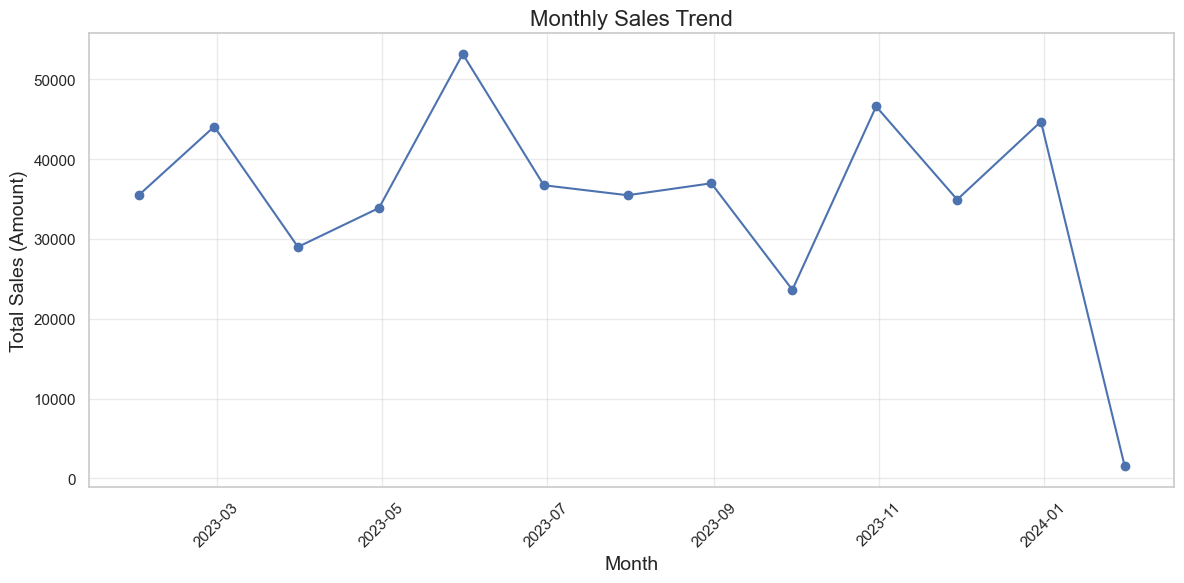

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales (Amount)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()